In [45]:
import sys, h5py, pdb,time, glob, os
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import scipy, scipy.stats
from scipy import interpolate
from matplotlib import ticker, patches
homedir = os.environ["HOME"] + '/'
repodir = homedir+'Dropbox/github_repositories/'
sys.path.append(repodir+'gizmo_analysis/pysrc/')

In [46]:
import workdirs as wd
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
ff.Snapshot_profiler.log_r2rvir_bins = np.arange(-3.5,2,.1)
#ff.Snapshot_profiler.useSaved = False
cmap = pl.get_cmap('viridis')
figdir = wd.basedir+'figures/'
import matplotlib.image as mpimg

In [47]:
CF_path = repodir+'cooling_flow/pysrc'
sys.path.append(CF_path)
import cooling_flow as CF, HaloPotential as Halo
%matplotlib inline

In [48]:
import GIZMO_ICs as ics
fiducial = ics.ICs(vc=200*un.km/un.s, Rvc=100*un.kpc, m=-0.5,
                   baseLambda=3e-23*un.erg*un.cm**3*un.s**-1,baseT=1e7*un.K,l=0,
                   Mdot =100*un.Msun/un.yr,
                   R_min=0.1*un.kpc,R_max=1e4*un.kpc,dlogr=0.01,
                   Rcirc=3*un.kpc, 
                   resolution = 1e6*un.Msun,
                   DiscScale = 1*un.kpc, DiscHeight = 1*un.kpc,
                   Z_CGM=1, #not used
                   fgas=0.2)
fiducial.calc_CF_solution(powerlaw=True)
res = fiducial.CF_solution

In [49]:
simname = 'test'
vc = 200. *un.km/un.s
Rcirc = 3.*un.kpc
snapshot_dt_Myr = 10
simdir = '../../data/tests/'
#simdir_lowres = wd.simdir+'/%s/output/'%simname_lowres
Nsnapshots,dt,rmax,subsample = 450,5,40,100
ts = -np.arange(Nsnapshots)*dt
ts = ts-ts[-1]

In [50]:
sim = l.KY_sim(simname,simdir,200*un.kpc,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=snapshot_dt_Myr,pr=False,
              analyticGravity= Halo.PowerLaw(m=-0.5,vc_Rvir=vc,Rvir=100*un.kpc))
sim.z = 0 #for cooling function
print(sim.galaxyname, sim.Nsnapshots())
iSnapshots = np.arange(0,201,50)

test 2059


/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), l

/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/pysrc/FIRE_files.py:71: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), l

200 133.734041791875


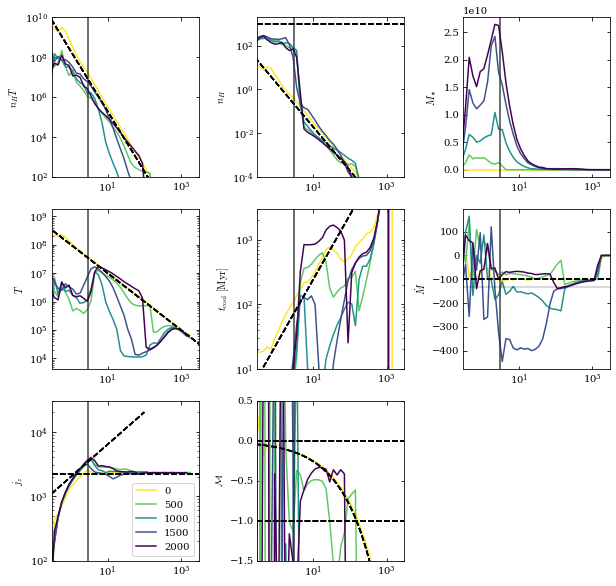

In [53]:
fig = pl.figure(figsize=(10,10)); pl.subplots_adjust(wspace=0.4)
for iPanel in range(8):
    ax = pl.subplot(3,3,iPanel+1)
    for ii,iSnapshot in enumerate(iSnapshots[:]):
        snapshot = sim.getSnapshot(iSnapshot)#sim.Nsnapshots()-1)
        prof = sim.getProfiler(iSnapshot)#sim.Nsnapshots()-1)
        ys = (prof.profile1D('nHTs','MW'),
              prof.profile1D('nHs','MW'),
              prof.massProfile([4]),
              prof.profile1D('Ts','MW'),
              prof.t_cool(use_actual_temperature=True,useP=False,limit_nH=False),
              prof.MdotProfile(),
              prof.jzProfile(),
              prof.profile1D('machs','MW')
             )[iPanel]
        ysBase=(res.nHs()*res.Ts(),
                res.nHs(),
                None,
                res.Ts(),
                res.t_cools().to('Myr'),
                None,None,
                -res.Ms(),
               )[iPanel]
        ylabel = (r'$n_H T$',
                 r'$n_H$',
                 r'$M_\star$',
                 r'$T$',
                 r'$t_{\rm cool}\ [{\rm Myr}]$',
                 r'$\dot{M}$',
                 r'$j_z$',
                 r'$\mathcal{M}$')[iPanel]
        pl.plot(prof.rs_midbins(),ys,c=pl.get_cmap('viridis')(1-iSnapshot/max(iSnapshots)),label=iSnapshot*10)
        if ysBase!=None: pl.plot(res.Rs(),ysBase,c='k',ls='--')
        pl.ylabel(ylabel)
        if iPanel==0:
            pl.ylim(100,1e10)
        if iPanel==1:
            pl.ylim(1e-4,2000)
            pl.axhline(1000,c='k',ls='--')
        if iPanel==6: 
            pl.ylim(100,3e4)
            pl.legend()
        if iPanel==4:
            pl.ylim(10,3000)
        if iPanel==5:
            pl.axhline(-res.Mdot.value,c='k',ls='--')
            if ii==len(iSnapshots)-1:
                Mdot_star = (prof.massProfile([4]).sum() - prof_old.massProfile([4]).sum())/(iSnapshot-iSnapshot_old)/snapshot_dt_Myr/1e6
                print(iSnapshot,Mdot_star)
                pl.axhline(-Mdot_star,c='k',ls='-',lw=0.3)
        if iPanel in (2,5,7):
            pl.semilogx()
        else:
            pl.loglog()
        if iPanel==6:
            j = 3*(3/100)**-0.5*200
            pl.axhline(j*2/np.pi,c='k',ls='--')
            pl.plot([0.3,100],j*(np.array([0.3,100])/3)**0.5,c='k',ls='--')
        if iPanel==7:
            pl.ylim(-1.5,0.5)
            pl.axhline(0,c='k',ls='--')
            pl.axhline(-1,c='k',ls='--')

        pl.xlim(0.3,3000)
        pl.axvline(3,c='k',ls='-',lw=0.3)
        prof_old, iSnapshot_old = prof, iSnapshot



In [15]:
xs,ys,zs = [snapshot.coords()[:,i] for i in range(3)]
zs += 0.25 #disk is offset for some reason
phis = np.arctan2(ys,xs)
Rs = (xs**2+ys**2)**0.5
rs = (Rs**2+zs**2)**0.5
thetas = np.arccos(zs/rs)

In [16]:
bins_Rs = np.arange(0.,100.1,1);  midbins_Rs = (bins_Rs[1:]+bins_Rs[:-1])/2
bins_zs = np.arange(-100.1,100.11,1); midbins_zs = (bins_zs[1:]+bins_zs[:-1])/2
Ts_cyl,_,_,bin_inds = scipy.stats.binned_statistic_2d(Rs,zs,log(snapshot.Ts()),statistic='median',bins=(bins_Rs,bins_zs))  

In [17]:
bins_xs = np.arange(-100.1,100.11,1); midbins_xs = (bins_xs[1:]+bins_xs[:-1])/2
bins_ys = np.arange(-100.1,100.11,1); midbins_ys = (bins_ys[1:]+bins_ys[:-1])/2
inds    = np.abs(zs)<10
Ts_faceon,_,_,bin_inds = scipy.stats.binned_statistic_2d(xs[inds],ys[inds],log(snapshot.Ts()[inds]),statistic='median',bins=(bins_xs,bins_ys))  

In [18]:
snapshot.cs().max()

3084.6824

In [19]:
snapshot.rs(4).max()

3.7132022

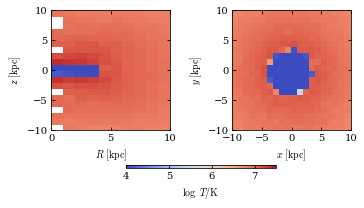

In [22]:
Tmin,Tmax = 4,7.5
fig = pl.figure(figsize=(fig_width_full*1.1,3.15))
gs = matplotlib.gridspec.GridSpec(1,3,wspace=0.45,right=0.99,left=0.03,width_ratios=(2,2,3.))
gs2 = matplotlib.gridspec.GridSpec(1,2,right=0.95,left=0.03)
ax1 = fig.add_subplot(gs[0])
mesh = pl.pcolormesh(midbins_Rs,midbins_zs,Ts_cyl.T,cmap='coolwarm',
                     zorder=-100,vmin=Tmin,vmax=Tmax,shading='nearest') 

pl.ylim(-10,10); pl.xlim(0,10)
pl.xlabel(r'$R\ [{\rm kpc}]$')
pl.ylabel(r'$z\ [{\rm kpc}]$')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2 = fig.add_subplot(gs[1])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
mesh = pl.pcolormesh(midbins_xs,midbins_ys,Ts_faceon.T,cmap='coolwarm',
                     zorder=-100,vmin=Tmin,vmax=Tmax,shading='nearest') 
# pl.quiver(midbins_xs_quiver,midbins_ys_quiver,vxs.T,vys.T)

pl.xlabel(r'$x\ [{\rm kpc}]$')
pl.ylabel(r'$y\ [{\rm kpc}]$')
pl.ylim(-10,10); pl.xlim(-10,10)
cb = pl.colorbar(mesh,ax=[ax1,ax2],orientation='horizontal',label=r'$\log\ T/{\rm K}$',
                 shrink=0.5,fraction=0.1,aspect=40,pad=0.2)
pl.clim(Tmin,Tmax)
#pl.savefig(figdir+'snapshot_map.png',bbox_inches='tight',dpi=600)

# for Drummond

In [9]:
bins_Rs = 10.**np.arange(-1.,2.1,0.02); midbins_Rs = (bins_Rs[1:]+bins_Rs[:-1])/2
bins_zs = 10.**np.arange(-1.,2.1,0.02); midbins_zs = (bins_zs[1:]+bins_zs[:-1])/2
Ts_cyl,_,_,bin_inds    = scipy.stats.binned_statistic_2d(Rs,zs,log(snapshot.Ts()),  statistic='median',bins=(bins_Rs,bins_zs))  
nHs_cyl,_,_,bin_inds   = scipy.stats.binned_statistic_2d(Rs,zs,log(snapshot.nHs()), statistic='median',bins=(bins_Rs,bins_zs))  
vphis_cyl,_,_,bin_inds = scipy.stats.binned_statistic_2d(Rs,zs,snapshot.v_phi(),    statistic='median',bins=(bins_Rs,bins_zs))  

/mnt/home/jstern/gizmo_analysis/pysrc/FIRE_files.py:341: RuntimeWarning: divide by zero encountered in true_divide
  return j_z / (self.rs()*self.sin_theta(z_vec))


In [10]:
_nHs2   = np.concatenate([nHs_cyl[::-1,:],nHs_cyl],axis=0)
_vphis2 = np.concatenate([vphis_cyl[::-1,:],vphis_cyl],axis=0)
_Ts2    = np.concatenate([Ts_cyl[::-1,:],Ts_cyl],axis=0)
_Rs2    = np.concatenate([-midbins_Rs[::-1],midbins_Rs],axis=0)
x = np.arange(0, _Ts2.shape[1])
y = np.arange(0, _Ts2.shape[0])
#mask invalid values
for i,arr in enumerate((_Ts2,_vphis2,_nHs2)):
    array = np.ma.masked_invalid(arr)
    xx, yy = np.meshgrid(x, y)
    #get only the valid values
    x1 = xx[~array.mask]
    y1 = yy[~array.mask]
    newarr = array[~array.mask]
    arr_fixed = interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')
    arr_fixed = arr_fixed[len(midbins_Rs):]
    if i==0: Ts_cyl_fixed = arr_fixed
    if i==1: nHs_cyl_fixed = arr_fixed
    if i==2: vphis_cyl_fixed = arr_fixed

In [11]:
np.savez('/mnt/home/jstern/ceph/sim_analysis/solution.npz',
         logTs=Ts_cyl_fixed,log_nHs = nHs_cyl_fixed,vphis = vphis_cyl_fixed,Rs=bins_Rs,zs=bins_zs)

# check offset in z is fixed

In [18]:
bins_Rs2 = np.arange(0.,40.1,1);  midbins_Rs2 = (bins_Rs2[1:]+bins_Rs2[:-1])/2
bins_zs2 = np.arange(-2.1,2.1,0.01); midbins_zs2 = (bins_zs2[1:]+bins_zs2[:-1])/2
Ts_cyl2,_,_,bin_inds2 = scipy.stats.binned_statistic_2d(Rs,zs,log(snapshot.Ts()),statistic='median',bins=(bins_Rs2,bins_zs2))  

(-2.0, 2.0)

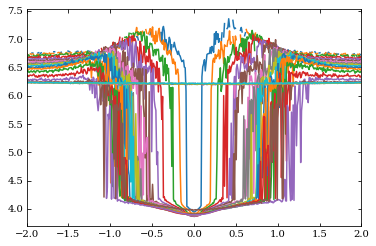

In [21]:
for i in range(0,20):
    pl.plot(midbins_zs2,Ts_cyl2[i,:])
    #print(midbins_Rs2[i],midbins_zs2[Ts_cyl2[i,:].argmin()])
pl.xlim(-2,2)

# hot gas profile plot

In [85]:
(0.62 * cons.m_p * (200*un.km/un.s)**2 / (5/3*cons.k_B*0.9)).to('K')

<Quantity 2002972.21125775 K>

In [24]:
print(snapshot.mus()[inds].min(),snapshot.mus()[inds].max(),ff.mu)
print(snapshot.ne2nHs()[inds].min(),snapshot.ne2nHs()[inds].max(),ff.ne2nH)

0.5951522 0.5951525 0.62
1.171864 1.1718651 1.2


### check Mdot

Text(0, 0.5, '$\\dot{M}\\ [{\\rm M}_\\odot\\,{\\rm yr}^{-1}]$')

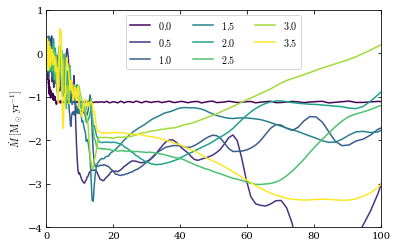

In [70]:
cmap = pl.get_cmap('viridis')
for i in range(8):
    prof = sim.getProfiler(i*10)
    pl.plot(prof.rs_midbins(), prof.MdotProfile(),label=r'$%.1f$'%(0.5*i),c=cmap(i/7))
    prof.tofile()
pl.legend(ncol=3)
pl.xlim(0,100)
pl.ylim(-4,1)
pl.ylabel(r'$\dot{M}\ [{\rm M}_\odot\,{\rm yr}^{-1}]$')

### check v_c

saved massProfile0
saved massProfile2
saved massProfile4


Text(0, 0.5, '$v_{\\rm c}$')

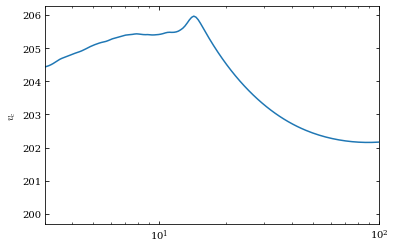

In [16]:
prof = sim.getProfiler(70)
pl.semilogx(prof.rs_midbins(), prof.vc())
prof.tofile()
pl.xlim(3,100)
pl.ylabel(r'$v_{\rm c}$')

# unknown plot

In [10]:
inds = (snapshot.Ts()<4e5) & (snapshot.Ts()>2e5) & (Rs>8) & (Rs<10)

NameError: name 'Rs' is not defined

In [ ]:
nHs = snapshot.nHs()
tcools = snapshot.t_cool()

In [30]:
js = np.array([coords[:,1] * vs[:,2] - coords[:,2] * vs[:,1],
               coords[:,2] * vs[:,0] - coords[:,0] * vs[:,2],
               coords[:,0] * vs[:,1] - coords[:,1] * vs[:,0]])
js=js.T
jzs = js[:,2]

In [31]:
vphis = jzs/Rs
Omegas = jzs/Rs**2 * un.km/un.s/un.kpc
vzs = vs[:,2]
vRs = (vs[:,0]*xs/rs + vs[:,1]*ys/rs)
vrs = (vs[:,0]*xs/rs + vs[:,1]*ys/rs + vs[:,2]*zs/rs)
# cos𝜃cos𝜙𝐱+cos𝜃sin𝜙𝐲−sin𝜃𝐳)𝜃
vthetas = vs[:,0]*np.cos(thetas)*np.cos(phis) + vs[:,1]*np.cos(thetas)*np.sin(phis) - vs[:,2]*np.sin(thetas)

$v_\theta$ mean=16.973, std=30.950
$v_r$ mean=-10.770, std=26.731
$v_\phi$ mean=213.642, std=24.410
$v_R$ mean=-10.196, std=26.616
$v_{|z|}$ mean=-17.283, std=31.048


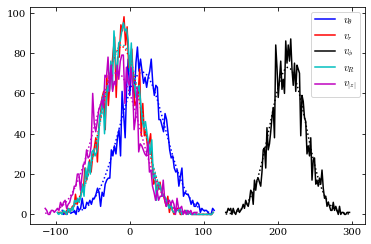

In [129]:
above_plane = (-1)**(zs<0.3)
vspherical = [(vthetas*above_plane)[inds],vrs[inds],vphis[inds],vRs[inds],(above_plane*vzs)[inds]]
for iv,v in enumerate(vspherical):
    c = 'brkcm'[iv]
    label = (r'$v_\theta$',r'$v_r$',r'$v_\phi$',r'$v_R$',r'$v_{|z|}$')[iv]
    a,b=pl.histogram(v,bins=100)
    mean,std = np.mean(v),np.std(v); print(label, 'mean=%.3f, std=%.3f'%(mean,std))
    bb = (b[1:]+b[:-1])/2; db = bb[1]-bb[0]
    pl.plot(bb,a,c=c,label=label)
    pl.plot(bb,scipy.stats.norm.pdf(bb,loc=mean,scale=std)*a.sum()*db,c=c,ls=':')
    pl.legend()

In [46]:
ls =((1e4*un.Msun/(4*np.pi/3*cons.m_p*nHs*un.cm**-3/0.7))**(1/3)).to('kpc')

In [54]:
(ls.to('cm')*nHs*un.cm**-3*ls**2/(2*un.kpc*2*np.pi*9*un.kpc))[inds].sum() * 5e-4*0.2/3

<Quantity 1.62538128e+14 1 / cm2>

In [61]:
np.median(ls[inds])

<Quantity 0.10943618 kpc>

In [60]:
np.median(nHs[inds])*1e-4/3

1.7197967817385993e-06

In [65]:
np.median(tcools[inds])

1.9614762444724372

In [69]:
(10*un.kpc / (200*un.km/un.s)).to('Myr')

<Quantity 48.88961108 Myr>

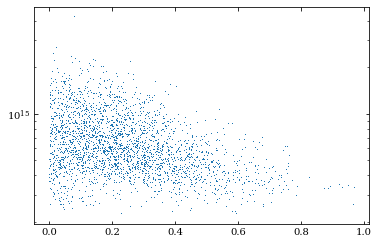

In [124]:
pl.semilogy(np.abs(zs[inds]-0.3),(ls*nHs*un.kpc.to('cm')*1e-4/3)[inds],',')

# verify cooling calculation is similar to that in FIRE

In [100]:
import os, glob
from scipy import interpolate
tables_dir = os.getenv("HOME")+'/github_repositories/gizmo_analysis/CoolingTables/'

def LambdaFile(z):
    fns = np.array(glob.glob(tables_dir+'z_?.???.hdf5'))
    zs = np.array([float(fn[-10:-5]) for fn in fns])
    fn = fns[zs.argsort()][u.searchsortedclosest(sorted(zs), z)]
    print(fn)
    f=h5py.File(fn,'r')
    return f

In [102]:
Zsun = [0.0129,0.2806,2.07e-3,8.36e-4,5.49e-3,1.41e-3,5.91e-4,6.83e-4,4.09e-4,6.44e-5,1.1e-3]

In [103]:
LAMBDA1 = ff.LambdaFunc(0)
print(LAMBDA1(2e6,0.1,0.1))
f = LambdaFile(0)
a = snapshot.dic['PartType0','Metallicity'][inds][0]
FIRE_inds = ['Z','Helium','Carbon','Nitrogen','Oxygen','Neon','Magnesium','Silicon','Sulphur','Calcium','Iron']
iHe = u.searchsortedclosest(f['Metal_free']['Helium_mass_fraction_bins'][:],a[1])
H_He_Cooling  = f['Metal_free']['Net_Cooling'][iHe,...]
Tbins         = f['Metal_free']['Temperature_bins'][...]
nHbins        = f['Metal_free']['Hydrogen_density_bins'][...]
Metal_Cooling = np.sum([f[FIRE_inds[i]]['Net_Cooling'][...]*a[i]/Zsun[i] for i in range(2,11)],axis=0)
f_H_He = interpolate.RegularGridInterpolator((log(Tbins), log(nHbins)),
                                                    H_He_Cooling,
                                                    bounds_error=False, fill_value=None)
f_Z    = interpolate.RegularGridInterpolator((log(Tbins), log(nHbins)),
                                                    Metal_Cooling,
                                                    bounds_error=False, fill_value=None)
f2 = lambda T,nH,f_H_He=f_H_He,f_Z=f_Z: (
        f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))))
f2(2e6,0.001)


1.4038108602647772e-23
/home/ysz5546/github_repositories/gizmo_analysis/CoolingTables/z_0.000.hdf5


1.3182569998698887e-23

In [173]:
bins_Rs = np.arange(-0.5,12.5,0.05); midbins_Rs = (bins_Rs[1:]+bins_Rs[:-1])/2
bins_zs = np.arange(-2.1,2.11,0.05); midbins_zs = (bins_zs[1:]+bins_zs[:-1])/2
hist_Ts,a,b,bin_inds = scipy.stats.binned_statistic_2d(Rs,zs,log(snapshot.Ts()),statistic='mean',bins=(bins_Rs,bins_zs))  
hist_vzs,a,b,bin_inds = scipy.stats.binned_statistic_2d(Rs,zs,np.abs(snapshot.vs()[:,2]),statistic='mean',bins=(bins_Rs,bins_zs))  

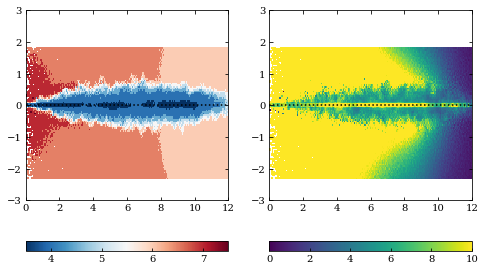

In [180]:
pl.figure(figsize=(8,5))
for iPanel in range(2):
    ax = pl.subplot(1,2,iPanel+1)
    if iPanel==0:
        mesh = pl.pcolormesh(midbins_Rs,midbins_zs-0.25,0.5*((hist_Ts.T+0.25)//0.5),cmap='RdBu_r',zorder=-100) 
    if iPanel==1:
        mesh = pl.pcolormesh(midbins_Rs,midbins_zs-0.25,(hist_vzs / (200*30*np.abs(midbins_zs-0.25))**0.5).T,
                             cmap='viridis',zorder=-100,vmax=10,vmin=0) 
    pl.ylim(-3,3); pl.xlim(0,12)
    cb = pl.colorbar(orientation='horizontal')
#     for i,ind in enumerate(theta_midbins):
#         pl.plot(tracks[i][0],tracks[i][1],c='k')
    pl.axhline(0,c='k',ls=':')

In [60]:
(10**3.5/2e6)**0.5 * 10

0.39763536438352537

In [151]:
bins_Rs = np.arange(-0.5,12.5,0.05); midbins_Rs = (bins_Rs[1:]+bins_Rs[:-1])/2
bins_zs = np.arange(0,2.11,0.05); midbins_zs = (bins_zs[1:]+bins_zs[:-1])/2
hist_masses,a,b,bin_inds = scipy.stats.binned_statistic_2d(
    np.concatenate([(snapshot.coords(j)[:,:2]**2).sum(axis=1)**0.5 for j in range(6) if j!=1]),
    np.concatenate([np.abs(snapshot.coords(j)[:,2]-0.25) for j in range(6) if j!=1]),
    np.concatenate([snapshot.masses(j) for j in range(6) if j!=1]),
    statistic='sum',bins=(bins_Rs,bins_zs))  

In [152]:
hist_masses.shape,  midbins_zs.shape, midbins_Rs.shape

((259, 42), (42,), (259,))

In [153]:
midbins_Rs_grid,midbins_zs_grid = np.meshgrid(midbins_Rs,midbins_zs)
g_isothermal = (200*un.km/un.s)**2 / (midbins_Rs_grid*un.kpc) * midbins_zs_grid / midbins_Rs_grid

In [154]:
gs = (2*np.pi*cons.G * hist_masses.sum(cumsum(axis=1).T*un.Msun / (0.05*un.kpc)**2).to('km**2*s**-2/kpc')


In [172]:
# gz ~ vc^2
((2*np.pi*cons.G*1e10*un.Msun / (np.pi*(10*un.kpc)**2) * 1*un.kpc)**0.5).to('km/s')

<Quantity 29.3288843 km / s>

In [166]:
np.searchsorted(midbins_Rs,10)

210

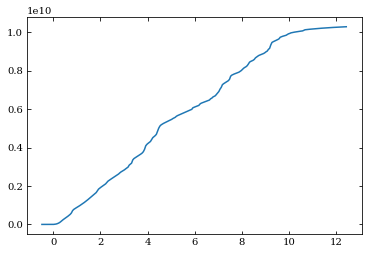

In [169]:
pl.plot(midbins_Rs,hist_masses.cumsum(axis=1).cumsum(axis=0)[:,-1])

In [155]:
#point source: 4pi r^2 g = 4 pi GM 
#plane parallel 2Ag = 4 pi G sigma A -> g = 2 pi G sigma

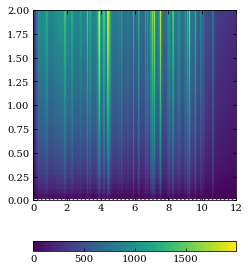

In [157]:
pl.figure(figsize=(8,5))
for iPanel in range(1,2):
    ax = pl.subplot(1,2,iPanel+1)
    if iPanel==0:
        mesh = pl.pcolormesh(midbins_Rs,midbins_zs-0.25,0.5*((hist_Ts.T+0.25)//0.5),cmap='RdBu_r',zorder=-100) 
    if iPanel==1:
        mesh = pl.pcolormesh(midbins_Rs,midbins_zs,(gs*midbins_zs_grid)**0.5,
                             cmap='viridis',zorder=-100) 
    pl.ylim(0,2); pl.xlim(0,12)
    cb = pl.colorbar(orientation='horizontal')
#     for i,ind in enumerate(theta_midbins):
#         pl.plot(tracks[i][0],tracks[i][1],c='k')
    pl.axhline(0,c='k',ls=':')

In [103]:
snapshot.dic[('PartType0','Masses')][:100]

array([0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.00590503,
       0.01771542, 0.01771542, 0.01771542, 0.01771542, 0.01771542,
       0.01771542, 0.01771542, 0.00590503, 0.00590503, 0.00590503,
       0.00590503, 0.00590503, 0.00590503, 0.00590503, 0.00590503,
       0.01771542, 0.00590503, 0.01771542, 0.01771542, 0.01771542,
       0.00590503, 0.00590503, 0.01771542, 0.01771542, 0.01771542,
       0.00590503, 0.00590503, 0.00590503, 0.00590503, 0.00590

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86, 

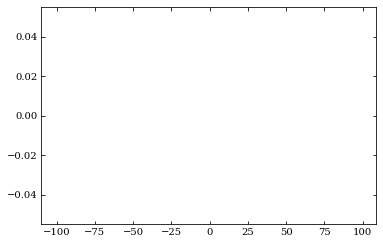

In [92]:
pl.hist(log(snapshot.masses()),bins=np.arange(-100,100))

In [77]:
a=snapshot.dic[('PartType0','Potential')]

KeyError: "Unable to open object (object 'Potential' doesn't exist)"